In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:
from hossam import load_data
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from scipy.spatial import ConvexHull

my_dpi=200

In [3]:
origin=load_data('game_usage')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

게임 이용시간(time spent)과 레벨(game level)에 대한 가상 데이터

===== 데이터 크기 확인 =====
데이터셋 크기 : (100, 2)
행 개수 : 100개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time spent  100 non-null    int64
 1   game level  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None


,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


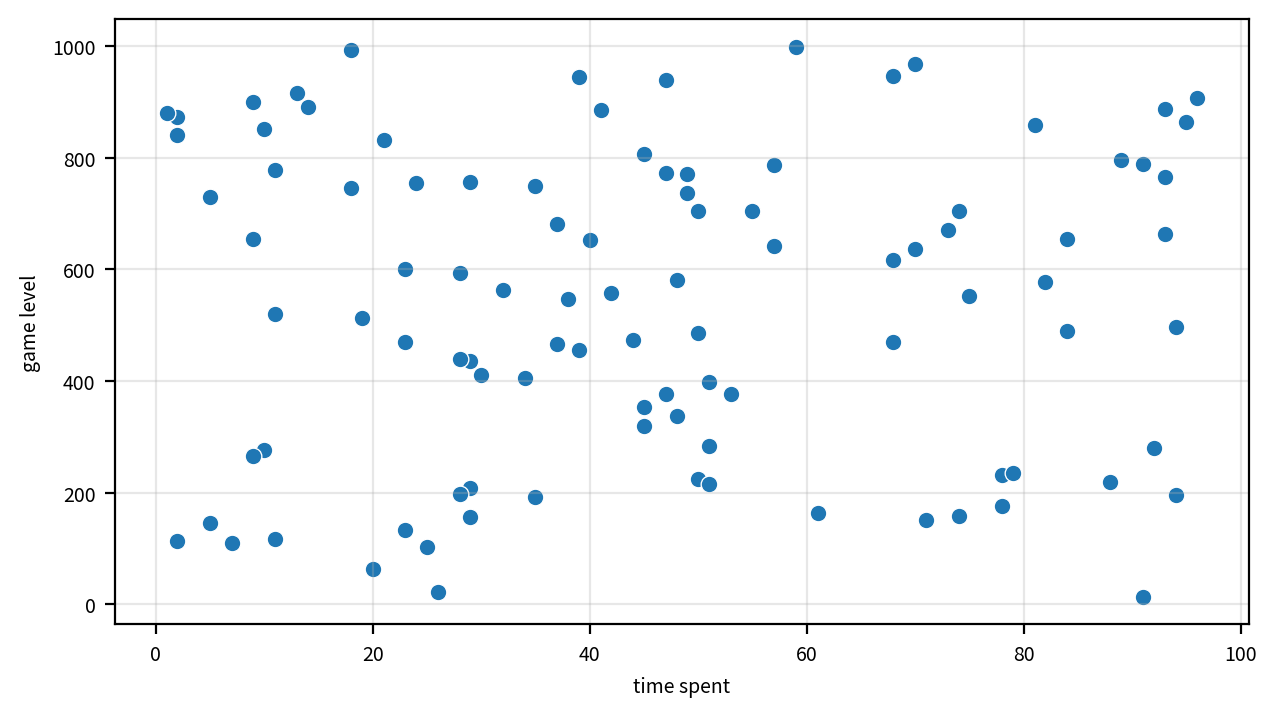

In [4]:
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.scatterplot(data=origin, x='time spent', y='game level')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [5]:
estimator=KMeans(n_clusters=4)
estimator.fit(origin)
cluster_pred=estimator.predict(origin)
cluster_pred

array([0, 3, 0, 0, 1, 0, 2, 2, 1, 2, 0, 3, 1, 3, 0, 1, 0, 1, 0, 3, 3, 0,
       1, 3, 1, 0, 3, 1, 2, 3, 3, 0, 2, 1, 0, 3, 2, 1, 1, 0, 2, 0, 0, 3,
       0, 3, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 3, 0, 2, 1, 3, 3, 3, 2, 0,
       2, 1, 2, 3, 0, 2, 1, 1, 0, 1, 0, 0, 1, 3, 1, 3, 2, 0, 1, 3, 0, 2,
       1, 1, 0, 3, 2, 3, 0, 0, 2, 0, 1, 2], dtype=int32)

In [7]:
df=origin.copy()
df['그룹번호']=cluster_pred
df.head()

,time spent,game level,그룹번호
0,39,944,0
1,55,705,3
2,29,757,0
3,59,999,0
4,7,109,1


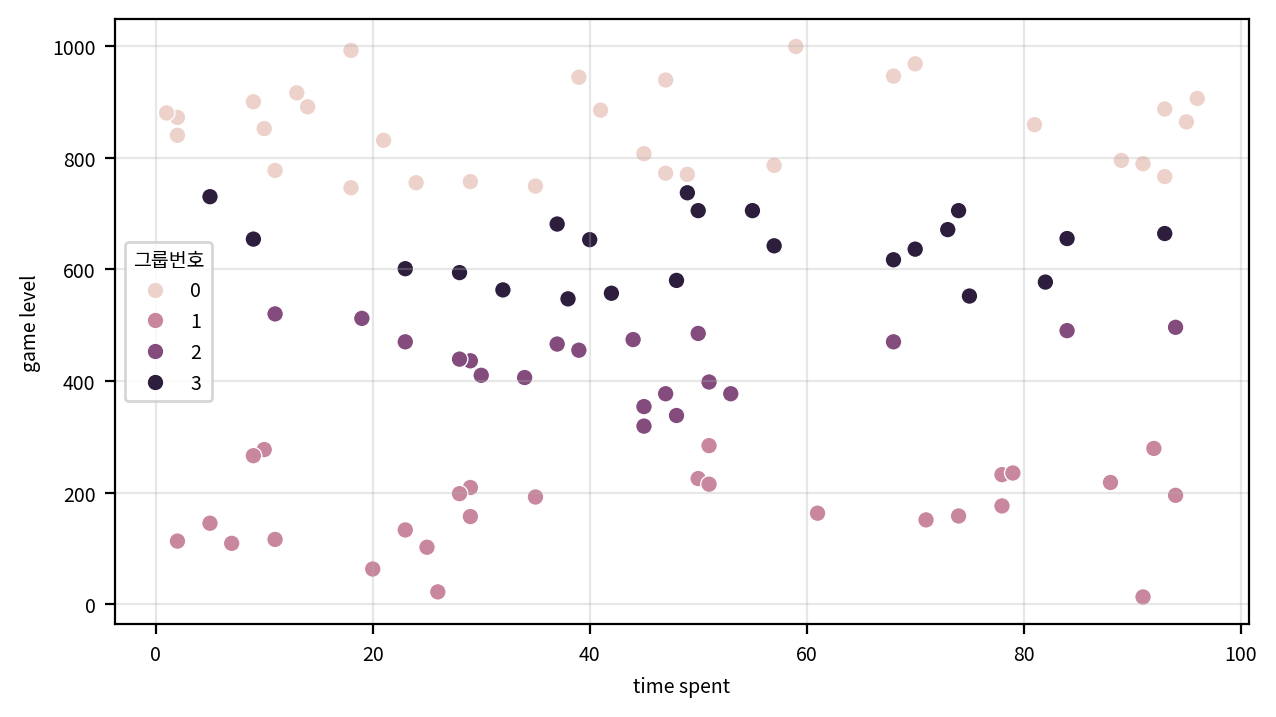

In [8]:
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.scatterplot(data=df, x='time spent', y='game level', hue='그룹번호')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

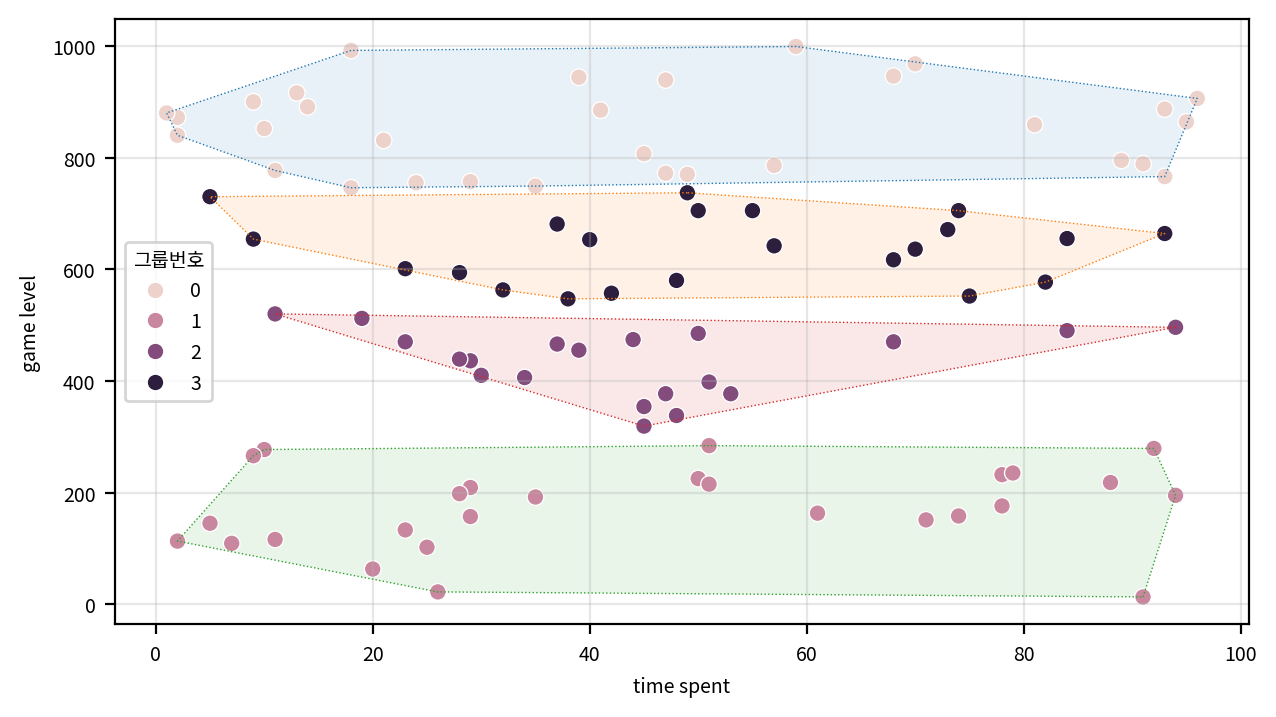

In [9]:
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in df['그룹번호'].unique():
    df_c=df.loc[df['그룹번호']==c, ['time spent', 'game level']]

    try:
        # 외곽선 좌표 계산
        hull=ConvexHull(df_c)
        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points=np.append(hull.vertices, hull.vertices[0])
        ax.plot(df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

sb.scatterplot(data=df, x='time spent', y='game level', hue='그룹번호')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

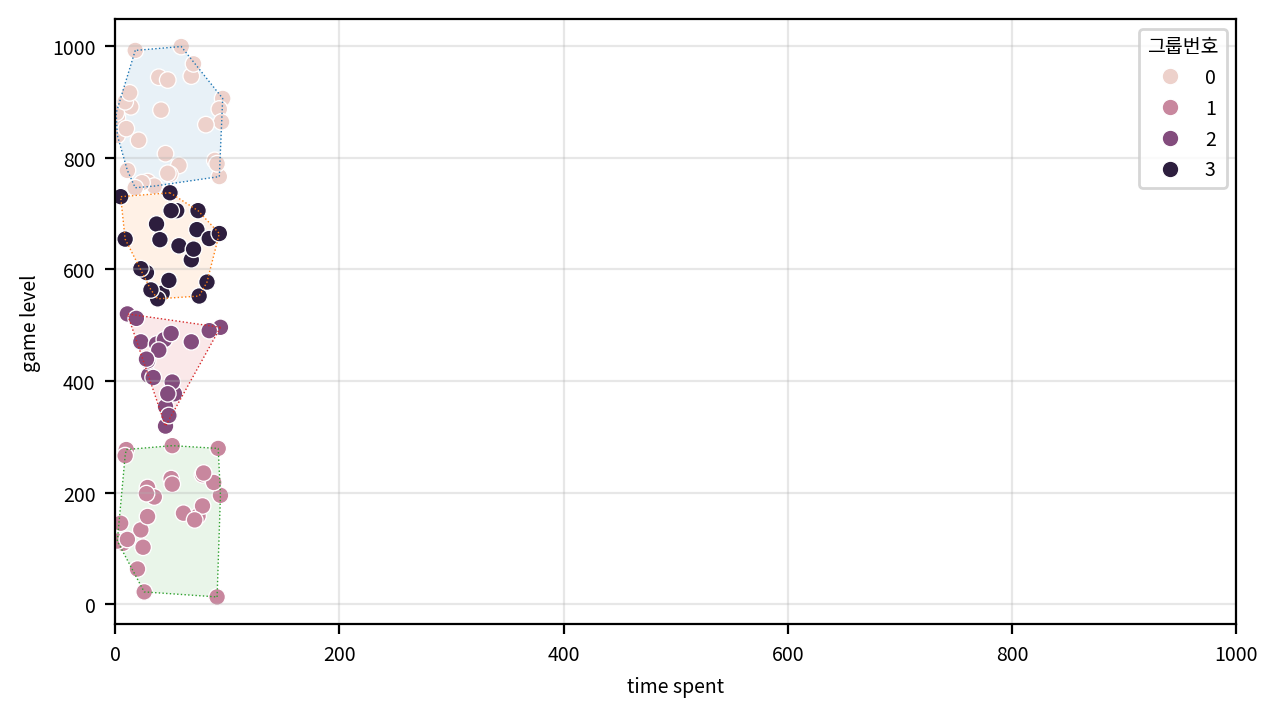

In [10]:
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in df['그룹번호'].unique():
    df_c=df.loc[df['그룹번호']==c, ['time spent', 'game level']]

    try:
        # 외곽선 좌표 계산
        hull=ConvexHull(df_c)
        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points=np.append(hull.vertices, hull.vertices[0])
        ax.plot(df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

sb.scatterplot(data=df, x='time spent', y='game level', hue='그룹번호')
ax.grid(True, alpha=0.3)
ax.set_xlim([0,1000])

plt.tight_layout()
plt.show()
plt.close()

In [11]:
scaler=StandardScaler()
sdf=DataFrame(scaler.fit_transform(origin), columns=origin.columns)
sdf

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652
...,...,...
95,0.037881,1.456640
96,0.146111,-0.192688
97,-1.188727,1.373084
98,1.192335,-1.100909


In [12]:
estimator=KMeans(n_clusters=4)
estimator.fit(sdf)
cluster=estimator.predict(sdf)
sdf['그룹번호']=cluster
sdf

,time spent,game level,그룹번호
0,-0.250733,1.474805,1
1,0.326494,0.606546,3
2,-0.611500,0.795456,1
3,0.470801,1.674613,3
4,-1.405187,-1.558652,2
...,...,...,...
95,0.037881,1.456640,1
96,0.146111,-0.192688,2
97,-1.188727,1.373084,1
98,1.192335,-1.100909,0


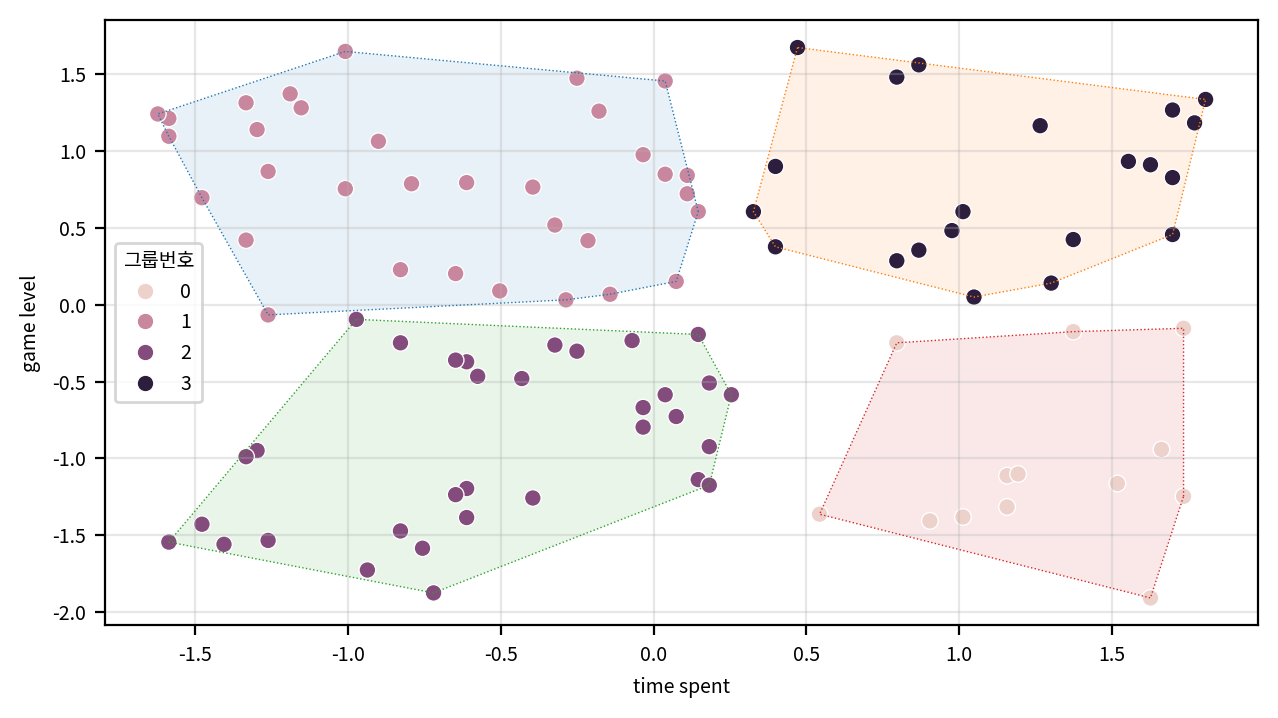

In [13]:
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in sdf['그룹번호'].unique():
    df_c=sdf.loc[sdf['그룹번호']==c, ['time spent', 'game level']]

    try:
        # 외곽선 좌표 계산
        hull=ConvexHull(df_c)
        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points=np.append(hull.vertices, hull.vertices[0])
        ax.plot(df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

sb.scatterplot(data=sdf, x='time spent', y='game level', hue='그룹번호')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

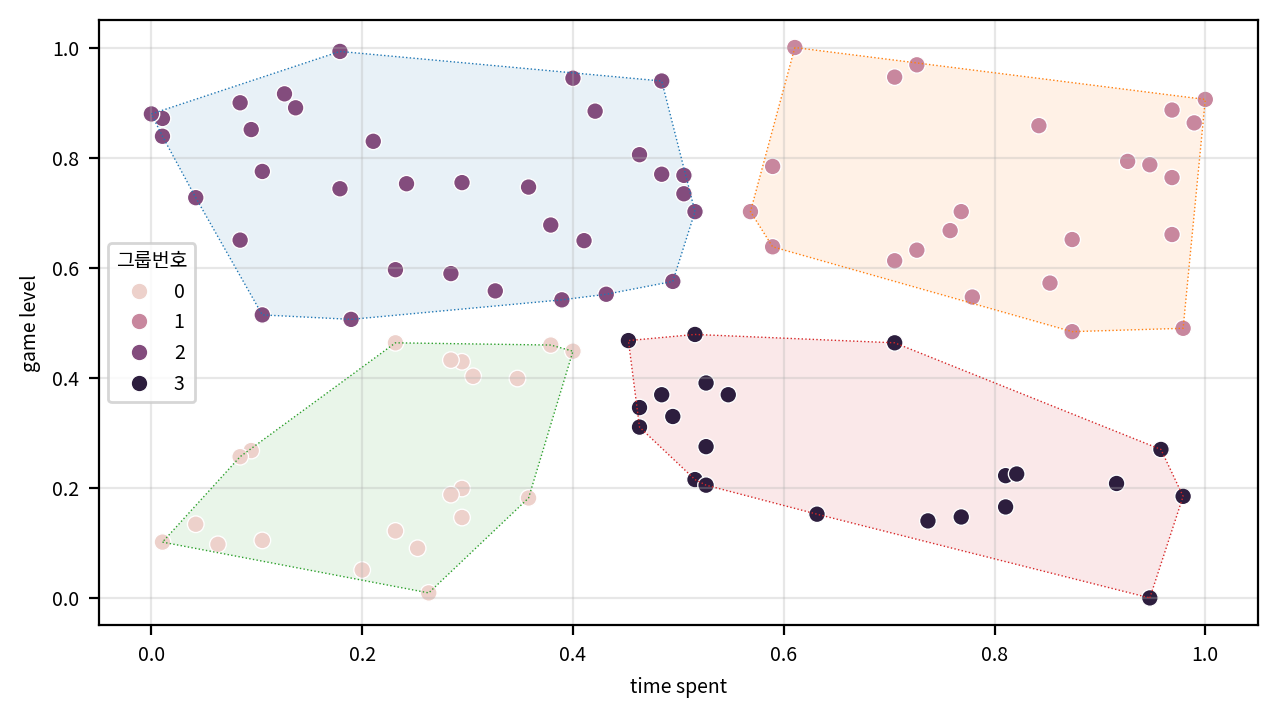

In [14]:
scaler=MinMaxScaler()
mdf=DataFrame(scaler.fit_transform(origin), columns=origin.columns)
estimator=KMeans(n_clusters=4)
estimator.fit(mdf)
cluster=estimator.predict(mdf)
mdf['그룹번호']=cluster

width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in mdf['그룹번호'].unique():
    df_c=mdf.loc[mdf['그룹번호']==c, ['time spent', 'game level']]

    try:
        # 외곽선 좌표 계산
        hull=ConvexHull(df_c)
        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points=np.append(hull.vertices, hull.vertices[0])
        ax.plot(df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

sb.scatterplot(data=mdf, x='time spent', y='game level', hue='그룹번호')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()